# Introduction Natural Language Processing

## Basics
### 1. Filtering
Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

### 2. Stopword
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

### 3. Stemming
Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”. Idenya adalah ketika anda mencari dokumen “cara membuka lemari”, anda juga ingin melihat dokumen yang menyebutkan “cara terbuka lemari” atau “cara dibuka lemari” meskipun terdengar tidak enak. Tentunya anda ingin mencocokan semua variasi kata untuk memunculkan dokumen yang paling relevan. 

### 4. Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat.

## Data PreProcessing
Tidak ada aturan pasti yang membahas setiap tahapan pada text preprocessing. Tentu saja untuk memastikan hasil yang lebih baik dan konsisten semua tahapan harus dilakukan. Untuk memberi gambaran tentang apa yang minimal seharusnya dilakukan, saya telah menguraikan tahapan menjadi harus dilakukan, sebaiknya dilakukan, dan tergantung tugas. Perlu diingat, less is more, anda ingin menjaga pendekatan dengan seindah mungkin. Semakin banyak fitur atau tahapan yang anda tambahkan, semakin banyak pula lapisan yang anda harus kupas.
* Harus dilakukan meliputi case folding (dapat tergantung tugas dalam beberapa kasus)
* Sebaiknya dilakukan meliputi normalisasi sederhana — misalnya menstandarkan kata yang hampir sama
* Tergantung tugas meliputi normalisasi tingkat lanjut — misalnya mengatasi kata yang tidak biasa, stopword removal dan stemming

Jadi, untuk mengatasi tugas apapun minimal anda harus melakukan case folding. Selanjutnya dapat ditambahkan beberapa normalisasi dasar untuk mendapatkan hasil yang lebih konsisten dan secara bertahap menambahkan tahapan yang lainnya sesuai yang anda inginkan.

In [9]:
# importing the module

import pandas as pd
import numpy as np
import nltk as nl
import os
import sys
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
print('Path location ', str(os.getcwd()))
mypath = os.path.join(os.path.dirname(os.getcwd()), 'Dataset')
print('Inside the dirs : ', os.listdir(mypath))

Path location  C:\JACK\Introduction of NLP\Notebooks
Inside the dirs :  ['CyberBullyingIG.csv', 'PilkadaDKI-2017_Tweet.csv', 'Readme.md', '__init__.py']


In [3]:
# Get sample file please choose PilkadaDKI-2017_tweets.csv

myfile = os.path.join(mypath, 'PilkadaDKI-2017_Tweet.csv')
print(myfile)

C:\JACK\Introduction of NLP\Dataset\PilkadaDKI-2017_Tweet.csv


In [4]:
Data = pd.read_csv(myfile, encoding = 'utf-8')
Data.dropna(how="any", inplace=True, axis=1)
Data.sample(10)

,Id,Sentiment,Pasangan Calon,Text Tweet
533,534,positive,Ahok-Djarot,@basuki_btp dan djarot semangat & sehat2 terus...
406,407,negative,Ahok-Djarot,"Lholho ini kenapa pendukung ahok, DP 0% terunt..."
785,786,positive,Anies-Sandi,Anies-Sandi Bakal Upayakan Hal Ini untuk Buruh...
175,176,positive,Agus-Sylvi,"@SBYudhoyono setelah pilkada DKI, AHY jadi san..."
449,450,negative,Ahok-Djarot,nasi bungkus terdeteksi #ahokdjarot
32,33,negative,Agus-Sylvi,Antasari Diancam Harry Tanoe https://youtu.be/...
386,387,negative,Ahok-Djarot,Haha.. Kayaknya sebentar lagi ada banyak bunga...
255,256,positive,Agus-Sylvi,Waktu itu .... ah sudahlah <Frowning Face> @di...
711,712,negative,Anies-Sandi,"Jadi kalo kalah, pasti badja berbuat curang? P..."
668,669,negative,Anies-Sandi,Kasihan katanya anti reklamasi tapi kok diteru...


In [5]:
Data.describe(include = 'object')

,Sentiment,Pasangan Calon,Text Tweet
count,900,900,900
unique,2,3,898
top,negative,Agus-Sylvi,"Setelah KO di beberapa Polling, kini mereka go..."
freq,450,300,2


In [6]:
Data.groupby('Sentiment').describe()

Id                                                        
           count   mean         std    min     25%    50%     75%    max
Sentiment                                                               
negative   450.0  375.5  249.023538    1.0  113.25  375.5  637.75  750.0
positive   450.0  525.5  249.023538  151.0  263.25  525.5  787.75  900.0

In [7]:
Data['LengthToken'] = Data['Text Tweet'].apply(len)
Data.describe()

,Id,LengthToken
count,900.000000,900.000000
mean,450.500000,110.961111
std,259.951919,37.361024
min,1.000000,4.000000
25%,225.750000,88.000000
50%,450.500000,118.000000
75%,675.250000,136.000000
max,900.000000,348.000000


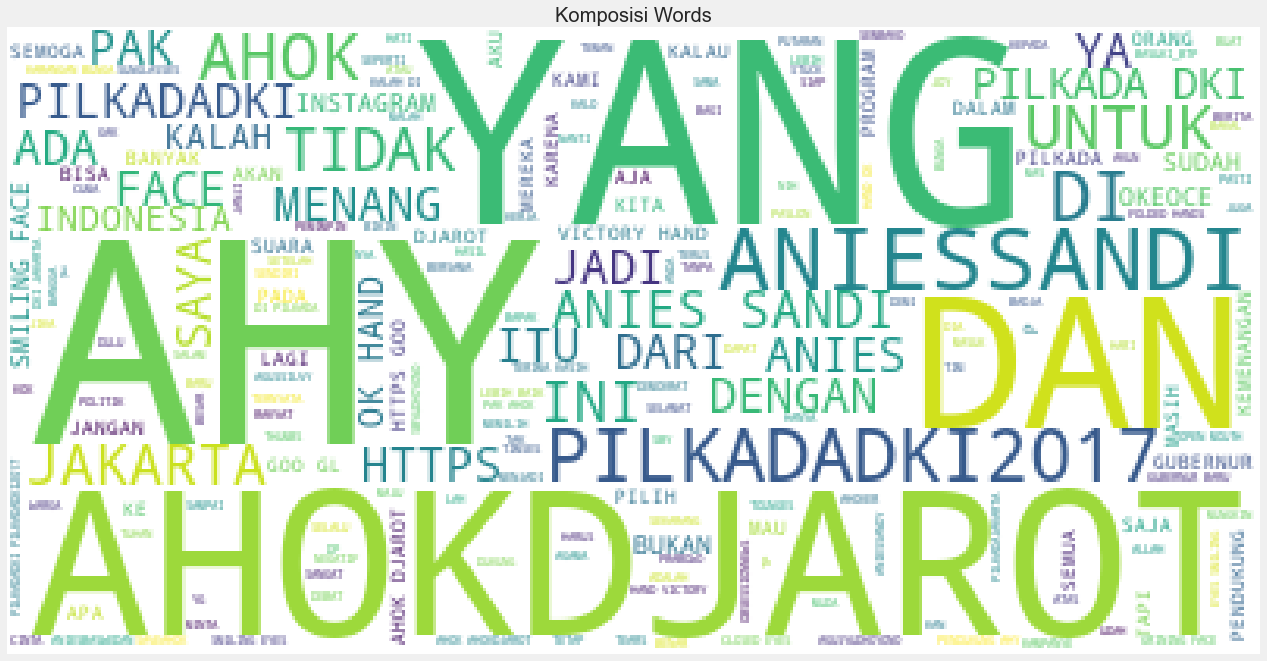

In [32]:
def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    plt.figure(figsize=(20,12))
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Komposisi Words")
    #plt.figure().set_figheight(30)
    plt.show()

wordcloud(Data['Text Tweet'])

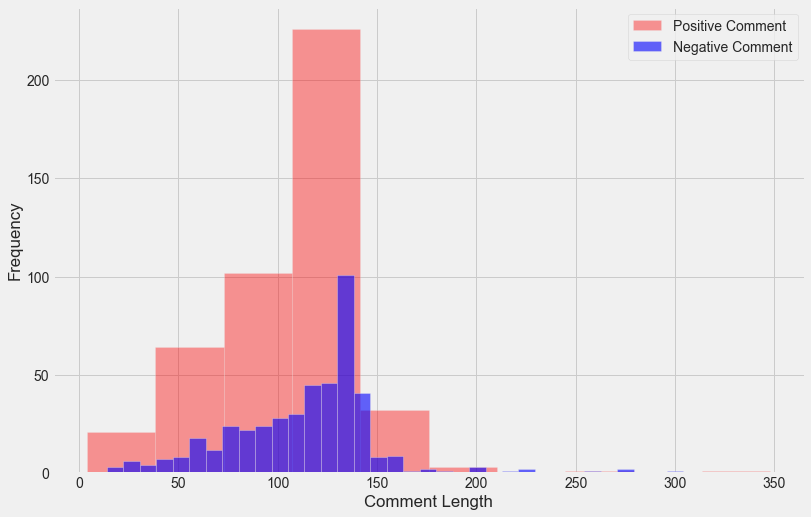

In [12]:
plt.figure(figsize=(12, 8))

Data[Data.Sentiment =='positive'].LengthToken.plot(kind='hist', color='red', 
                                       label='Positive Comment', alpha=0.4)
Data[Data.Sentiment =='negative'].LengthToken.plot(bins=35, kind='hist', color='blue', 
                                       label='Negative Comment', alpha=0.6)
plt.legend()
plt.xlabel("Comment Length")
plt.show()

## Helper Function

In [17]:
from logging import getLogger
from fnmatch import fnmatch
from typing import Optional
import os
logger = getLogger('[DataPreProcs]')


def SearchFiles(DirPath : Optional[str] = None, 
                keyword : Optional[str] = '*.',
               ) :
    '''
    DirPath = string of path
    keyword = string that contain special char * or **
    for example :
        keyword = 'Data**.csv'
    '''
    FilePaths                   = list()
    try :
        if (DirPath == '') or (DirPath == None) or (len(DirPath) == 0) :
            DirPath             = LocDir
        elif not os.path.isdir(DirPath) :
            logger.warning('[SearchFiles Warning] This is not a Directory !!!')
        if not isinstance(keyword, str) :
            logger.warning('[SearchFiles Warning] Keyword is not String type !!!')
        for paths, _, files in os.walk(DirPath):
            for file in files:
                if fnmatch(file, keyword) or \
                fnmatch(str(file).lower(), keyword.lower()) :
                    filepath    = os.path.join(paths, file)
                    FilePaths.append(os.path.realpath(filepath))
    except Exception as Arch :
        Error                   = f'''
    [SearchFiles ERROR] Failed to find the files.
    [SearchFiles ERROR] Message : {Arch}.
        '''
        logger.error(Error)
    finally :
        if len(FilePaths) > 1 :
            try :
                from natsort import natsorted
                FilePaths = natsorted(FilePaths)
            except :
                FilePaths.sort()
        return FilePaths


## Simple Tokenizer

Kita dapat menggunakan dictionary stopwords yang sudah kita siapkan.

In [38]:
from nltk.tokenize import word_tokenize
from os.path import dirname
from typing import List
import re

def CallStop(Dictpath : Optional[str] = None):
    Hitme = list()
    with open(Dictpath, 'r') as FileIndo :
        for me in FileIndo :
            stripme = me.strip()
            listme = stripme.split()
            Hitme.append(listme[0])
    return Hitme

def IndoStopWords(Text : Optional[str] = None,
                  OnlyToken : Optional[bool] = False,
                  Dictlist : Optional[List] = list(),
                 ) :
    Tokens = list()
    try :
        assert isinstance(Text, str), 'Text is not string.'
        Text = Text.lower()
        Text = re.sub('[^a-zA-Z\s]', '', Text) #Remove number
        Text = re.sub(r'[^\w\s]', '', Text) #Remove Punctuation
        Text = str(Text).replace('  ', ' ')
        Tokens = word_tokenize(Text)
        if not OnlyToken :
            assert bool(len(Dictlist)), 'ListDict is empty'
            Tokens = [Wd for Wd in Tokens if not Wd in Dictlist]
    except Exception as Arc:
        logger.error(f'Error as : {Arc}')
    finally :
        return Tokens

# Run the Function
Test = 'Apa yang dimakan oleh bambang76 apakah 59 mengapa?'
StopWDpath = SearchFiles(dirname(os.getcwd()), '*stopword*')
#print(StopWDpath[0])
StopLs = CallStop(StopWDpath[0])
FinalTest = IndoStopWords(Text = Test, 
                      OnlyToken = False,
                      Dictlist = StopLs,
                     )
print(FinalTest)

['dimakan', 'bambang']


## Tokenizer using Sastrawi

In [55]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import math

'''
Preprocessing
1. Remove stopword 
2. Stemming
'''

# remove most common word
def Stopword_removal(sentence):
    stopword_factory = StopWordRemoverFactory()
    stopwords = stopword_factory.get_stop_words()
    words = sentence.split()
    output = ""
    for word in words:
        if word not in stopwords:
            output = output +" "+word

    return output

# stemming process
def Stemming(sentence):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output  = stemmer.stem(sentence)
    return output

def Tokenizing(sentence) :
    words = sentence.split()
    tokens = {}
    for word in words:
        try:
            tokens[word] = tokens[word]  + 1
        except KeyError:
            tokens[word] = 1

    return tokens

# preprocessing , remove stopword and stemming process
def Preprocessing(sentence):
    sentence = Stopword_removal(sentence)
    output  = Stemming(sentence)
    return output

if __name__ == '__main__' :
    Kalimat = 'Mengapa semuanya begitu RUMIT ya? Saya sendiri BINGUNG.'

    print('Stopwords : ', Stopword_removal(Kalimat))
    print('Stemming : ', Stemming(Kalimat))
    print('Tokenizing : ', Tokenizing(Kalimat))
    print('Preprocessing : ', Preprocessing(Kalimat))

Stopwords :   Mengapa RUMIT ya? Saya BINGUNG.
Stemming :  mengapa semua begitu rumit ya saya sendiri bingung
Tokenizing :  {'Mengapa': 1, 'semuanya': 1, 'begitu': 1, 'RUMIT': 1, 'ya?': 1, 'Saya': 1, 'sendiri': 1, 'BINGUNG.': 1}
Preprocessing :  mengapa rumit ya saya bingung


#### **Catatan**
Korpus adalah kumpulan teks otentik yang diatur ke dalam kumpulan data. Otentik di sini berarti teks tertulis yang diucapkan oleh penduduk asli bahasa atau dialek tersebut. Korpus dapat terdiri dari apa saja mulai dari surat kabar, novel, resep, siaran radio hingga acara televisi, film, dan tweet. Dalam pemrosesan bahasa alami, korpus berisi data teks dan ucapan yang dapat digunakan untuk melatih AI dan sistem pembelajaran mesin. Jika pengguna memiliki masalah atau tujuan tertentu yang ingin mereka atasi, mereka memerlukan kumpulan data yang mendukung, atau setidaknya merupakan representasi dari, apa yang ingin mereka capai dengan pembelajaran mesin dan NLP.

In [50]:
## Calculation of Recommendation

# count term frequency
def Tf(sentence,word):
    tokens =  Tokenizing(sentence)
    for key, value in tokens.items():
        tokens[key] = math.log(1 + value)
    try:
        return tokens[word]
    except KeyError:
        return 0

def Idf(number_document,frequency):  
    if frequency == 0 :
        return 0
    invers = float(1 + number_document)/float( 1 + frequency)
    output =  math.log(invers)
    return output

# number of documents containing terms in the corpus
def Frequency(documents,term):
    frequency = 0
    for key, document in documents.items():
        document = Preprocessing(document)
        terms = document.split()
        if term in terms:
            frequency = frequency + 1
    return frequency
    
def TfIdf(article,documents):
    sentence =  Preprocessing(article)
    n_document =  len(documents)
    scores = {}
    for document_id, document_data in documents.items():
        document_data = Preprocessing(document_data)
        document_term = sentence.split()
        for term in document_term:
            frequency_term = Tf(document_data,term)
            frequency  = Frequency(documents,term)
            tf_idf = frequency_term * Idf(n_document,frequency)
            try:
                scores[document_id] = scores[document_id] + tf_idf
            except KeyError:
                if tf_idf > 0:
                    scores[document_id] =  tf_idf
               
    scores = sorted(scores.items(), key=lambda x: x[1],reverse=True)
    return scores

documents  = {}  
documents[1] = "Banyak yang Meragukannya Karena Usia, Ini Kata Mahathir Mohamad" 
documents[2] = "Eksklusif : Wan Azizah: Mahathir dan Anwar Ibrahim Bahas Kabinet"
documents[3] = "Najib Razak Dicekal Usai Kalah di Pemilu Malaysia, Mahathir: Kami Ingin Mengembalikan Aturan Hukum"
documents[4] = "Anwar Ibrahim Akan Bebas pada 15 Mei 2018?"
documents[5] = "Prabowo Subianto: Malu saya dengan Mahathir Mohamad"
documents[6] = "Najib Razak kalah dalam pemilu Malaysia"

article = "Mahathir akan Bebaskan Anwar Ibrahim, Setelah 18 Tahun Bermusuhan"


recomendation = TfIdf(article, documents)
for key,val in recomendation:
    print(str(val) + " - " + documents[key])


dict

In [40]:
from transformers import pipeline
import xformers

classifier = pipeline('sentiment-analysis')
classifier('We are very happy to introduce pipeline to the transformers repository.')

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.9.13 (you have 3.9.7)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\alastn87\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alastn87\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


[{'label': 'POSITIVE', 'score': 0.9996980428695679}]

### Saved Model
Model yang berhasil di download tersimpan di 
`C:\Users\<yourname>\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english`
<br>
Mari kita coba untuk model Indo. URL nya di `https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification/tree/main`

In [44]:
from huggingface_hub import hf_hub_download
pretrained= "mdhugol/indonesia-bert-sentiment-classification"
os.makedirs('./ModelIndo', exist_ok = True)
hf_hub_download(repo_id=pretrained, filename="tokenizer_config.json", cache_dir="./ModelIndo")

'./ModelIndo\\models--mdhugol--indonesia-bert-sentiment-classification\\snapshots\\80ccb4c2817cf976534ac491020a9572e5dae54f\\tokenizer_config.json'

In [46]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#pretrained= "mdhugol/indonesia-bert-sentiment-classification"
pretrained = '.\ModelIndo\MdHugol'

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

pos_text = "Sangat bahagia hari ini bisa mengerti NLP"
neg_text = "Dasar kampungan ngak paham NLP!! Kurang ajar!!"

result = sentiment_analysis(pos_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

result = sentiment_analysis(neg_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')


Text: Sangat bahagia hari ini bisa mengerti NLP | Label : positive (99.109%)
Text: Dasar kampungan ngak paham NLP!! Kurang ajar!! | Label : negative (99.767%)


## Penutup
Dalam tulisan ini kita telah mengetahui langkah dasar dan praktis pada text preprocessing beserta library yang digunakan dalam python. Selanjutnya hasil dari text preprocessing dapat digunakan untuk analisa NLP yang lebih rumit, contohnya machine translation. Tidak semua kasus membutuhkan level preprocessing yang sama. Dalam beberapa kasus anda bisa menggunakan salah satu tahap dari preprocessing paling sederhana yaitu case folding. Namun semua tahap akan dibutuhkan apabila anda mempunyai dataset dengan level noise sangat tinggi.